## Objectives:
## • Learn to use Cross validation to pick the best models.

In [1]:
## Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Load the data from “glass.csv” and make a bar plot of different types of glasses.

In [2]:
## Reading data from file into dataframe

df=pd.read_csv(r"./datasets/glass.csv")

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


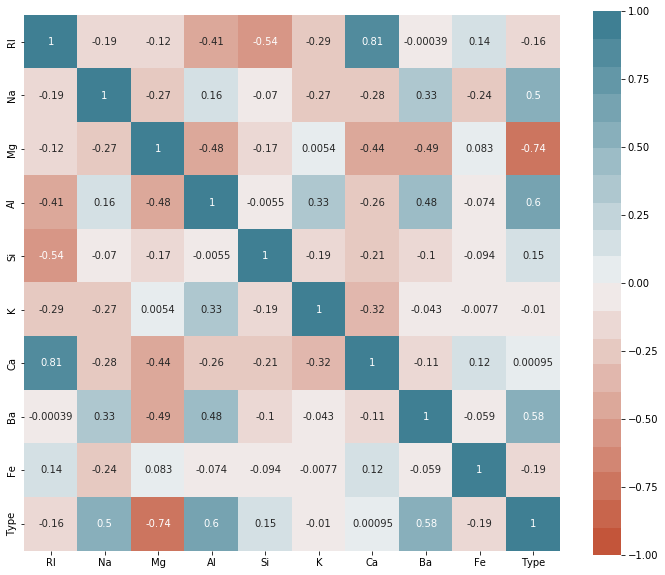

In [8]:
## Generating headmap for determining correlation
plt.figure(figsize = (12, 10))
sns.heatmap(data = df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=20),
    square=True)
plt.show()

### 2. Make a train_test split and fit a single decision tree classifier.

### Applying test train split

In [10]:
## These columns will be used for logistic regression

x_col = df.columns[:-1]
y_col = df.columns[-1]

In [12]:
X = df[x_col]
Y = df[y_col]
Y = np.squeeze(Y)

In [13]:
## importing test train split package
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=48)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(171, 9) (43, 9) (171,) (43,)


### Apply DecisionTree Classifer Algorithm

In [17]:
## importing Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
## importing accuracy functions
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [111]:
dt = DecisionTreeClassifier(criterion = "gini",random_state = 48,max_depth=3, min_samples_leaf=2)

In [112]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=48)

In [113]:
y_pred = dt.predict(X_test)

In [114]:
print(f"Decision Tree has training accuracy score of {round(accuracy_score(dt.predict(X_train), y_train),3)}")

Decision Tree has training accuracy score of 0.749


In [115]:
print(f"Decision Tree has testing accuracy score of {round(accuracy_score(y_test, y_pred),3)}")

Decision Tree has testing accuracy score of 0.628


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.89      0.84         9
           2       0.81      0.68      0.74        19
           3       0.50      0.40      0.44         5
           5       0.50      1.00      0.67         2
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         8

    accuracy                           0.77        43
   macro avg       0.60      0.66      0.62        43
weighted avg       0.79      0.77      0.77        43



### 3. Make a k-fold split with 3 splits and measure the accuracy score with each split
[Hint: Refer to KFold module under sklearn’s model selection.]

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [65]:
## Preparing for traning
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=48)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(171, 9) (43, 9) (171,) (43,)


In [67]:
## Model for training
model = DecisionTreeClassifier(criterion = "gini",random_state = 48,max_depth=4, min_samples_leaf=5)

In [78]:
## KFold split
cv = KFold(n_splits=3, random_state=48, shuffle=True)

In [79]:
scores = cross_val_score(model,df[x_col] , df[y_col], scoring='accuracy', cv=cv, n_jobs=-1)

In [80]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.687 (0.032)


In [84]:
for i,s in enumerate(scores):
    print(f"Split = {i + 1}, Score = {round(s,2)} ")

Split = 1, Score = 0.67 
Split = 2, Score = 0.66 
Split = 3, Score = 0.73 


### 4. Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer along with a 10-fold cross validation.
[Hint: Define a range of estimators and feed in range as param_grid]

### Performing GridSearch

In [85]:
## importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [86]:
from sklearn.model_selection import GridSearchCV

In [91]:
rf = RandomForestClassifier(random_state = 48) 

In [92]:
## To see all hyper parameters for tuning
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [101]:
param_grid = {
    'bootstrap':[True,False],
    'max_depth': [2, 4, 8, 16],
    'n_estimators' : [40, 64, 128, 256],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ["gini","entropy"],
    "verbose": [1],
}

In [102]:
cv = KFold(n_splits=10, random_state=48, shuffle=True)

In [103]:
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv = cv, n_jobs=-1)

In [104]:
grid_results = grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 128 out of 128 | elapsed:    0.1s finished


In [105]:
grid_results.cv_results_

{'mean_fit_time': array([0.09443457, 0.17145171, 0.33386555, 0.62268801, 0.11453054,
        0.15205607, 0.34566896, 0.65067677, 0.11288714, 0.16069019,
        0.32926233, 0.62160778, 0.10782833, 0.17670021, 0.32868547,
        0.70162501, 0.11417644, 0.18532996, 0.32374306, 0.64305928,
        0.10263681, 0.158725  , 0.34039781, 0.63947351, 0.11310186,
        0.16861203, 0.33897295, 0.65465744, 0.10790093, 0.16928854,
        0.32145662, 0.64496739, 0.10544906, 0.16467278, 0.42515457,
        0.80715213, 0.14629538, 0.24924915, 0.45031838, 0.94381397,
        0.15145607, 0.24730241, 0.39640892, 0.72725716, 0.12231729,
        0.19207313, 0.37484372, 0.74501793, 0.12077887, 0.18339193,
        0.3654866 , 0.7550071 , 0.1428895 , 0.22849908, 0.37522378,
        0.72590399, 0.12236569, 0.19119303, 0.37670627, 0.73274028,
        0.13226624, 0.19804659, 0.4611578 , 0.77757902, 0.12816608,
        0.21765654, 0.45698776, 0.92312722, 0.15859997, 0.21061656,
        0.39024632, 0.7662967 ,

In [106]:
grid_results.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'auto',
 'n_estimators': 128,
 'verbose': 1}

## Building Random forest with best parameters from GridSearchCV

In [107]:
rf_final = RandomForestClassifier(random_state = 48,
                                 bootstrap= False,
                                 criterion= 'gini',
                                 max_depth=16,
                                 max_features= 'auto',
                                 n_estimators= 128,
                                 n_jobs= -1) 

In [108]:
rf_final.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=16, n_estimators=128,
                       n_jobs=-1, random_state=48)

In [109]:
y_pred_final = rf_final.predict(X_test)

In [117]:
print(f"Decision Tree has testing accuracy score of {round(accuracy_score(y_test, y_pred_final),3)}")

Decision Tree has testing accuracy score of 0.721


## The Random Forest with best parameter has given score of 0.72